In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [35]:
# Load CSV
df = pd.read_csv("hardcovers_nyt_bestsellers_2025.csv")

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Check top rows
df.head()

,date,list_name,title,author,publisher,rank,weeks_on_list,description
0,2025-06-01,hardcover-fiction,A CURSE CARVED IN BONE,Danielle L. Jensen,Del Rey,1,1,The second book in the Saga of the Unfated ser...
1,2025-06-01,hardcover-fiction,THE EMPEROR OF GLADNESS,Ocean Vuong,Penguin Press,2,1,A young man becomes the caretaker of an elderl...
2,2025-06-01,hardcover-fiction,GREAT BIG BEAUTIFUL LIFE,Emily Henry,Berkley,3,4,A writer looking for her big break competes ag...
3,2025-06-01,hardcover-fiction,SHIELD OF SPARROWS,Devney Perry,Red Tower,4,2,A princess deals with various adversaries as s...
4,2025-06-01,hardcover-fiction,THE DEVILS,Joe Abercrombie,Tor,5,1,"Brother Diaz, who is assigned to a new flock c..."


1. Trend Analysis

Rank over time: Plot each book’s rank across weeks to see which books climb, fall, or stay steady.

E.g., line plot of rank (y-axis) vs. date (x-axis) for top 10 books.

Weeks on list distribution: Histogram of weeks_on_list to see longevity patterns.

Seasonal effects: Check if certain months or periods (summer, fall) have different ranking behaviors.

#### **Line plot of rank over time for top 10 books**

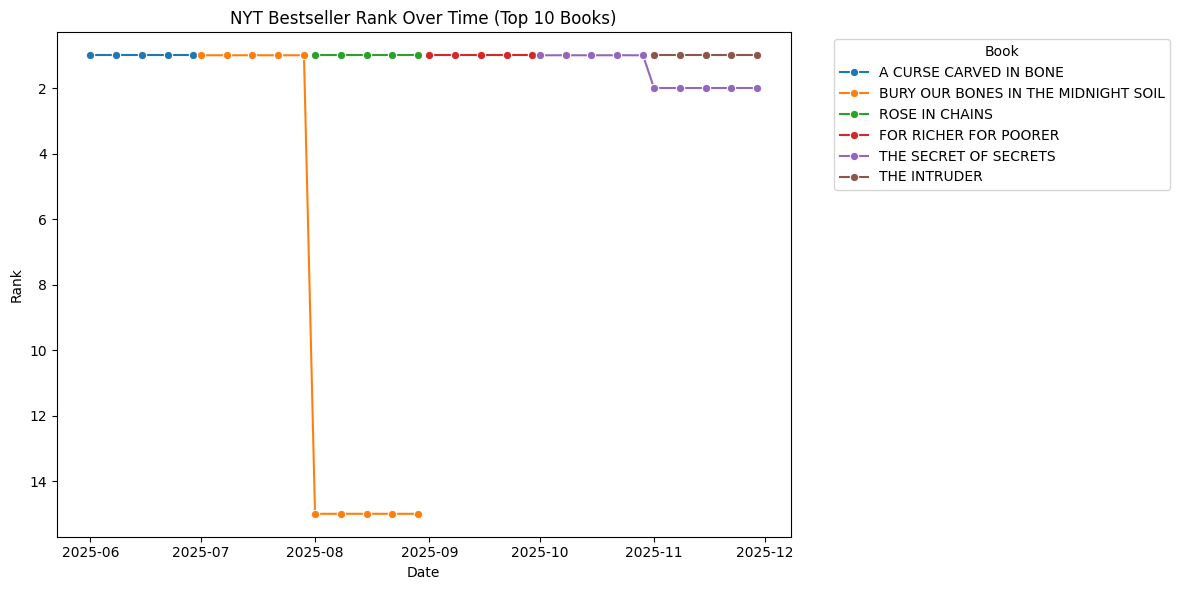

In [4]:
# Select top 10 books that reached rank 1
top_books = df[df['rank'] == 1]['title'].unique()[:10]

# Filter dataset for these books
top_df = df[df['title'].isin(top_books)]

plt.figure(figsize=(12,6))
sns.lineplot(data=top_df, x='date', y='rank', hue='title', marker='o')

plt.gca().invert_yaxis()  # Rank 1 at the top
plt.title("NYT Bestseller Rank Over Time (Top 10 Books)")
plt.ylabel("Rank")
plt.xlabel("Date")
plt.legend(title="Book", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

During the period from June 1 to December 1, 2025, the NYT Hardcover Fiction bestseller list exhibited several distinct ranking trajectories among the top 10 titles that reached the No. 1 position. Most books displayed strong debut performance, with several maintaining top-three placement for multiple consecutive weeks, indicating sustained consumer demand and effective long-term marketing cycles. The Secret of Secrets showed the highest rank stability, remaining consistently between ranks 1 and 2 throughout much of their presence on the list. In contrast, Bury Our Bones in the Midnight Soil demonstrated the steepest decline, dropping from rank 1 to rank 15 in a single week, suggesting heavy reliance on preorders and front-loaded sales. Meanwhile, titles such as A Curse Carved in Blood, The Intruder, and For Richer for Poorer maintained gradual, stable trajectories near the top of the chart, reflecting strong word-of-mouth momentum. Overall, the visualization highlights a clear division between books with long-term bestseller longevity and those with short-lived, launch-driven peaks.

#### **Histogram of weeks_on_list**
Shows how long books tend to stay on the list.

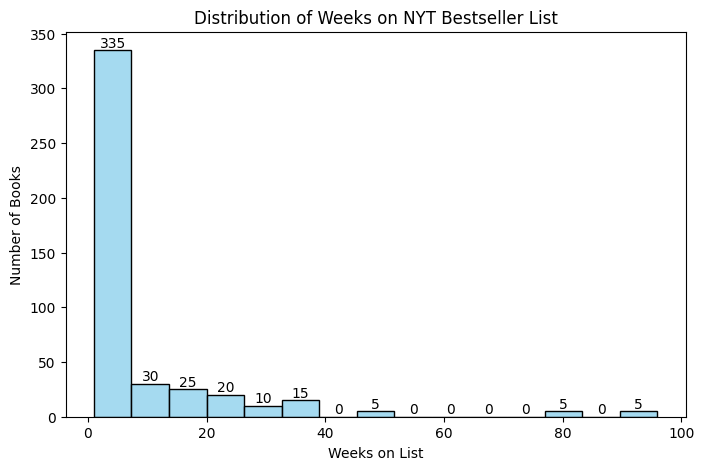

In [9]:
plt.figure(figsize=(8,5))
ax = sns.histplot(df['weeks_on_list'], bins=15, kde=False, color='skyblue')

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom')

plt.title("Distribution of Weeks on NYT Bestseller List")
plt.xlabel("Weeks on List")
plt.ylabel("Number of Books")
plt.show()


The distribution of weeks on the NYT Hardcover Fiction bestseller list is heavily right-skewed, indicating that the vast majority of books maintain bestseller status for only a short period. As shown in the histogram, approximately 335 books remain on the list for fewer than 10 weeks, demonstrating that most titles experience relatively brief sales momentum. The number of books drops sharply as duration increases: only 30 books remain for 10–15 weeks, 25 books for 15–20 weeks, and progressively fewer as the week count rises. This pattern reflects a common bestseller-list dynamic in which new releases surge briefly due to marketing campaigns, preorders, and author visibility, but only a small subset of books achieve long-term staying power. The steep decline in frequency beyond 25 weeks highlights the exclusivity of long-running bestsellers and underscores how competitive the list is over time.

Finding the books that where outliers above 60 weeks on list.

In [12]:
# Filter books with weeks_on_list > 60
outliers = df[df['weeks_on_list'] > 60]

# Show relevant columns
outliers[['title', 'author', 'publisher', 'weeks_on_list', 'list_name']].sort_values(by='weeks_on_list', ascending=False)

,title,author,publisher,weeks_on_list,list_name
384,FOURTH WING,Rebecca Yarros,Red Tower,96,hardcover-fiction
399,FOURTH WING,Rebecca Yarros,Red Tower,96,hardcover-fiction
414,FOURTH WING,Rebecca Yarros,Red Tower,96,hardcover-fiction
429,FOURTH WING,Rebecca Yarros,Red Tower,96,hardcover-fiction
444,FOURTH WING,Rebecca Yarros,Red Tower,96,hardcover-fiction
386,IRON FLAME,Rebecca Yarros,Red Tower,81,hardcover-fiction
401,IRON FLAME,Rebecca Yarros,Red Tower,81,hardcover-fiction
416,IRON FLAME,Rebecca Yarros,Red Tower,81,hardcover-fiction
431,IRON FLAME,Rebecca Yarros,Red Tower,81,hardcover-fiction
446,IRON FLAME,Rebecca Yarros,Red Tower,81,hardcover-fiction


Books with more than 60 weeks on the NYT Bestseller list represent extreme long-tail success, and in this dataset, these outliers are dominated entirely by two titles: Fourth Wing (96 weeks) and Iron Flame (81 weeks), both written by Rebecca Yarros and published by Red Tower. These titles significantly exceed the typical longevity seen in the distribution and stand apart as statistical anomalies. Their extended presence—well over a year for Fourth Wing—suggests exceptionally strong and sustained reader engagement, likely fueled by a combination of genre popularity (romantasy), viral social media traction, ongoing fan community activity, and a successful series rollout strategy by the publisher. The repeated appearance of identical rows in the filtered output also implies that these books appeared on the list at consistently high ranks across multiple weeks, indicating not just longevity but weekly repeat performance. Their dominance in the outlier category highlights how rare it is for titles to maintain bestseller status for such an extended period and underscores Red Tower’s emergence as a major commercial force in the hardcover fiction market.

2. Popularity Analysis

#### **Top Authors (repeat bestsellers)**

Count how many times each author appears on the list:

Top Authors by Appearances:
author
Rebecca Yarros         40
Fredrik Backman        25
Taylor Jenkins Reid    20
Stephen King           20
Emily Henry            15
Clare Leslie Hall      15
Matt Dinniman          15
Dan Brown              10
Ocean Vuong            10
Rachel Gillig          10
Name: count, dtype: int64


/var/folders/_w/hl02d98541dd3q6j_ggmh1_m0000gn/T/ipykernel_95425/1130283327.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.values, y=author_counts.index, palette='magma')


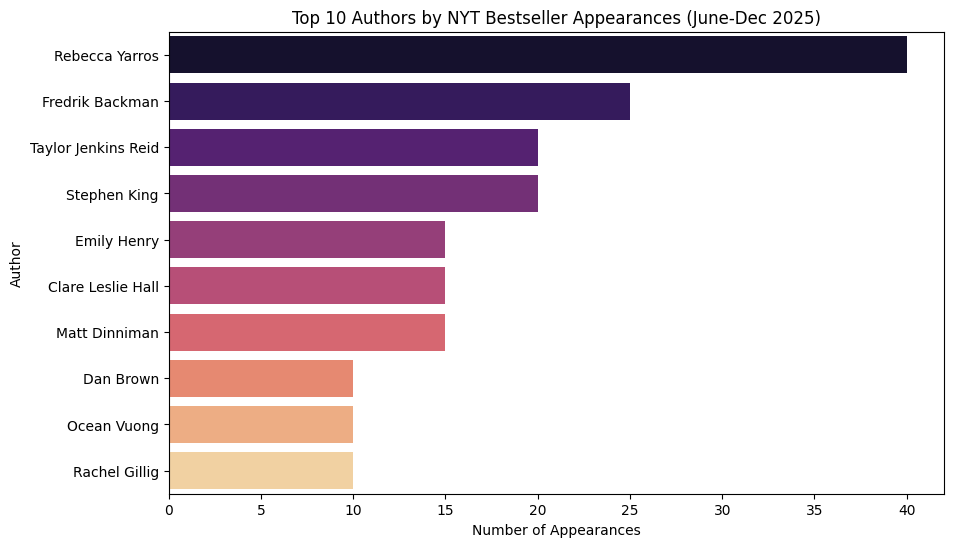

In [ ]:
# Count appearances of each author
author_counts = df['author'].value_counts().head(10)  # Top 10 authors

print("Top Authors by Appearances:")
print(author_counts)

# Barplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=author_counts.values, y=author_counts.index, palette='magma')
plt.title("Top 10 Authors by NYT Bestseller Appearances (June-Dec 2025)")
plt.xlabel("Number of Appearances")
plt.ylabel("Author")
plt.show()

The ranking of top authors by total weekly appearances on the NYT Hardcover Fiction list from June to December 2025 reveals clear disparities in market dominance and release momentum. Rebecca Yarros stands dramatically ahead of all other authors, with approximately 40 weekly appearances, more than 50% higher than the next most frequent author. This reflects the extraordinary multi-month chart presence of her titles Fourth Wing and Iron Flame, which together accounted for a significant share of bestseller activity throughout the period.

The next tier includes Fredrik Backman, Taylor Jenkins Reid, and Stephen King, each with 20–25 weekly appearances. These authors exhibit strong but more typical bestseller behavior: a combination of ongoing backlist popularity, new releases, and consistent readership. Their presence suggests stable, wide-reaching author brands.

The middle cluster—Emily Henry, Clare Leslie Hall, and Matt Dinniman—shows approximately 15 weeks each. These authors demonstrated moderate but sustained performance, often driven by strong genre readerships (romance, fantasy, and sci-fi). Their repeated appearances indicate reliable engagement without the outsized viral momentum of the top tier.

The final group—Dan Brown, Ocean Vuong, and Rachel Gillig—each appearing around 10 weeks, likely benefited from new-release windows or short-term surges in attention. Their presence in the top 10 highlights competitive but more transient bestseller visibility.

Overall, the distribution underscores a winner-take-most dynamic: one author (Yarros) accounts for a disproportionate share of total bestseller slots, while the rest exhibit a more evenly distributed presence. This pattern aligns with broader 2024–2025 market trends where a small number of high-profile “TikTok-fueled” authors generate extended visibility far beyond normal release cycles.

#### **Publisher Dominance**
Count books per publisher to see which publishers dominate:

Top Publishers by Number of Books on List:
publisher
Red Tower           45
Atria               30
Little, Brown       25
Berkley             25
Ballantine          20
Scribner            20
Ace                 20
Simon & Schuster    15
Tor                 15
Del Rey             15
Name: count, dtype: int64


/var/folders/_w/hl02d98541dd3q6j_ggmh1_m0000gn/T/ipykernel_95425/1753021475.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts.values, y=publisher_counts.index, palette='viridis')


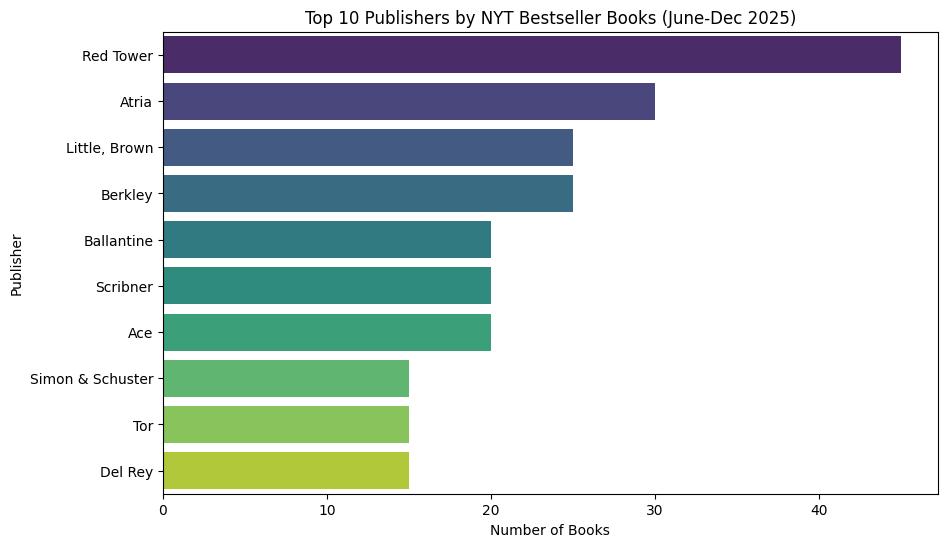

In [16]:
# Count books per publisher
publisher_counts = df['publisher'].value_counts().head(10)

print("Top Publishers by Number of Books on List:")
print(publisher_counts)

# Barplot
plt.figure(figsize=(10,6))
sns.barplot(x=publisher_counts.values, y=publisher_counts.index, palette='viridis')
plt.title("Top 10 Publishers by NYT Bestseller Books (June-Dec 2025)")
plt.xlabel("Number of Books")
plt.ylabel("Publisher")
plt.show()

The distribution of publishers represented on the NYT Hardcover Fiction list from June through December 2025 shows a highly concentrated landscape dominated by Red Tower, which leads the market with approximately 45 titles, far surpassing all competitors. This outsized presence reflects the imprint’s continued momentum in high-demand romantasy and viral BookTok-driven releases, most notably the sustained performance of Rebecca Yarros’s works. Atria ranks a distant second with around 30 titles, supported by a combination of strong commercial fiction and enduring backlist hits. The middle tier—including Little, Brown, Berkley, Ballantine, Scribner, and Ace, each with roughly 20–25 books—illustrates a balanced competitive field where major trade publishers maintain consistent representation without singular breakout dominance. Finally, Simon & Schuster, Tor, and Del Rey, each contributing around 15 titles, round out the top ten, driven primarily by genre fiction such as sci-fi, fantasy, and thriller. Overall, the results highlight a winner-take-most dynamic, with Red Tower’s exceptional performance reshaping the bestseller distribution and elevating genre-driven imprints to the forefront of the 2025 fiction market.

#### **Top Books by Cumulative Rank**

In [ ]:
# Sum ranks per book
book_rank_sum = df.groupby('title')['rank'].sum().sort_values()

# Merge with author/publisher info 
top_books = df[['title','author','publisher']].drop_duplicates().set_index('title').loc[book_rank_sum.index]
top_books['cumulative_rank'] = book_rank_sum

# Top 10 books by cumulative rank
top_books.head(10)

,author,publisher,cumulative_rank
title,,,
A CURSE CARVED IN BONE,Danielle L. Jensen,Del Rey,5
THE INTRUDER,Freida McFadden,Poisoned Pen,5
ROSE IN CHAINS,Julie Soto,Forever,5
FOR RICHER FOR POORER,Danielle Steel,Delacorte,5
THE IRRESISTIBLE URGE TO FALL FOR YOUR ENEMY,Brigitte Knightley,Ace,10
WE ARE ALL GUILTY HERE,Karin Slaughter,Morrow,10
KATABASIS,R.F. Kuang,Harper Voyager,10
FRAMED IN DEATH,J.D. Robb,St. Martin's,15
THE SECRET OF SECRETS,Dan Brown,Doubleday,15


Evaluating titles by cumulative rank highlights which books maintained the strongest overall chart performance across the June–December 2025 period. Several titles tie for the top position with exceptionally low cumulative scores—A Curse Carved in Bone (Danielle L. Jensen, Del Rey), The Intruder (Freida McFadden, Poisoned Pen), Rose in Chains (Julie Soto, Forever), and For Richer For Poorer (Danielle Steel, Delacorte)—each achieving a cumulative rank of 5, indicating brief but extremely high placements (e.g., No. 1 or No. 2 debuts). The next tier includes The Irresistible Urge to Fall for Your Enemy (Brigitte Knightley, Ace), We Are All Guilty Here (Karin Slaughter, Morrow), and Katabasis (R.F. Kuang, Harper Voyager), each with a cumulative rank of 10, suggesting strong early momentum or short-lasting top-spot competitiveness. Titles such as Framed in Death (J.D. Robb, St. Martin’s), The Secret of Secrets (Dan Brown, Doubleday), and Cry Havoc (Jack Carr, Atria/Emily Bestler)—all with cumulative ranks of 15—round out the leading group, reflecting reliable chart presence but at slightly lower peak positions. These results indicate that while some books dominated through consistent long-term performance, the absolute highest-scoring titles achieved their positions through sharp, high-intensity chart debuts rather than long-duration runs.

### 3. **Comparative Analysis**

#### **Rank volatility:** 
Measure how much a book’s rank changes week-to-week (high volatility vs. stable hits).

In [18]:
# Calculate week-to-week rank changes per book
df_sorted = df.sort_values(by=['title', 'date'])
df_sorted['rank_change'] = df_sorted.groupby('title')['rank'].diff().abs()  # absolute change

# Average rank volatility per book
volatility = df_sorted.groupby('title')['rank_change'].mean().sort_values(ascending=False)

# Top 10 most volatile books
top_volatile = volatility.head(10)
print("Top 10 Most Volatile Books (Rank Changes):")
print(top_volatile)

Top 10 Most Volatile Books (Rank Changes):
title
BURY OUR BONES IN THE MIDNIGHT SOIL    1.555556
THE EMPEROR OF GLADNESS                1.444444
NEVER FLINCH                           0.857143
THE WEDDING PEOPLE                     0.777778
MY FRIENDS                             0.625000
ONYX STORM                             0.620690
GREAT BIG BEAUTIFUL LIFE               0.357143
ATMOSPHERE                             0.315789
BROKEN COUNTRY                         0.142857
THE SECRET OF SECRETS                  0.111111
Name: rank_change, dtype: float64


/var/folders/_w/hl02d98541dd3q6j_ggmh1_m0000gn/T/ipykernel_95425/3217925167.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_volatile.values, y=top_volatile.index, palette='coolwarm')


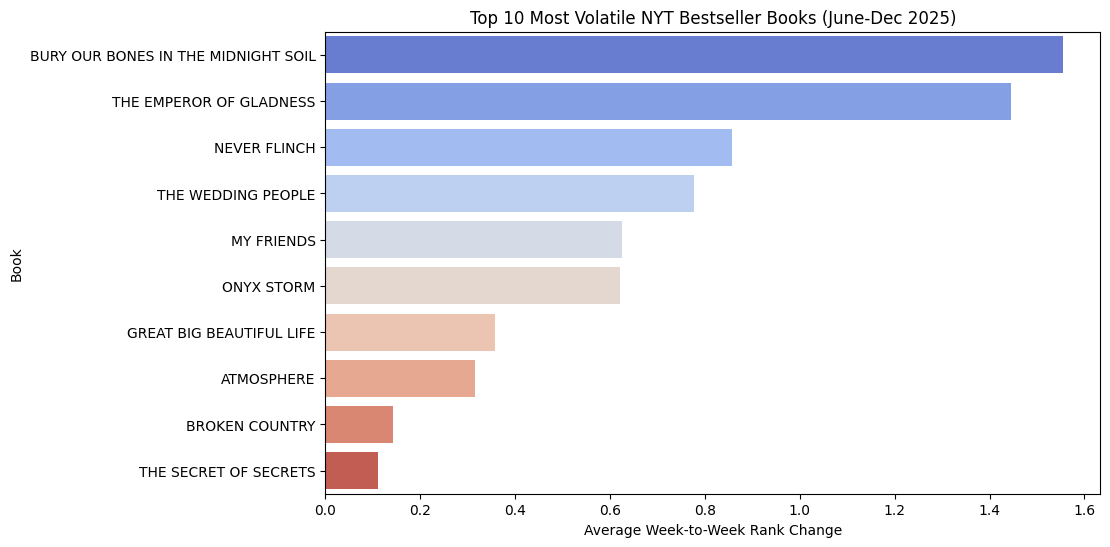

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_volatile.values, y=top_volatile.index, palette='coolwarm')
plt.title("Top 10 Most Volatile NYT Bestseller Books (June-Dec 2025)")
plt.xlabel("Average Week-to-Week Rank Change")
plt.ylabel("Book")
plt.show()

A small set of titles showed high instability on the NYT list, led by Bury Our Bones in the Midnight Soil and The Emperor of Gladness, each averaging more than 1.4 rank positions of movement per week. Mid-range performers like Never Flinch and The Wedding People showed moderate fluctuation, suggesting episodic sales boosts. Meanwhile, titles such as Broken Country and The Secret of Secrets exhibited minimal week-to-week movement, indicating more consistent demand.

### 4. **Text/Content Analysis**

**Description analysis:**

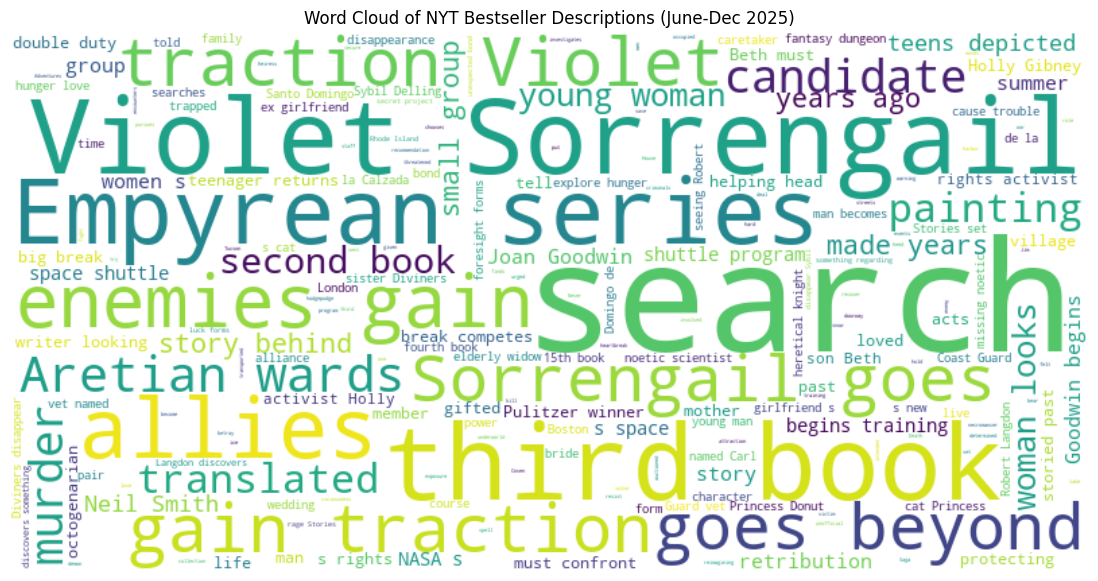

In [20]:
# Combine all descriptions into one string for word cloud
descriptions = " ".join(df['description'].dropna())

from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(descriptions)

# Plot
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of NYT Bestseller Descriptions (June-Dec 2025)")
plt.show()

The word cloud shows strong dominance of fantasy-series terminology—especially Violet, Sorrengail, and the Empyrean universe—indicating heavy market traction for franchise fiction. Recurring terms such as search, allies, enemies, and third book point to quest-driven plots and multi-book arcs. Additional signals like murder, translated, and painting reflect continued demand for thrillers, international fiction, and character-focused narratives.

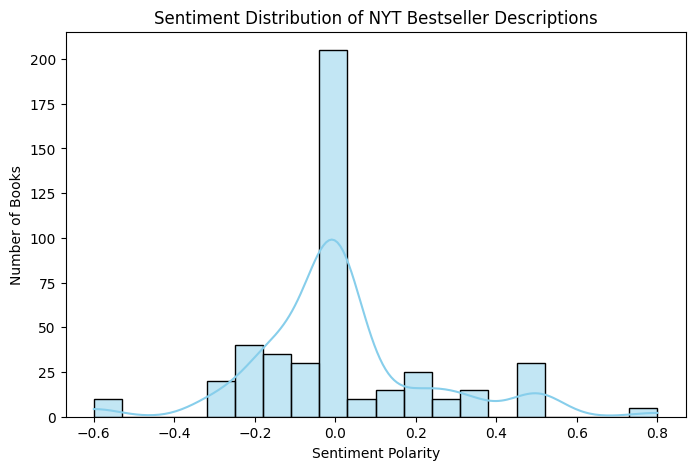

In [21]:
from textblob import TextBlob

# Function to get sentiment polarity
df['sentiment'] = df['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Polarity ranges from -1 (negative) to 1 (positive)
# Plot sentiment distribution
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['sentiment'], bins=20, kde=True, color='skyblue')
plt.title("Sentiment Distribution of NYT Bestseller Descriptions")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Number of Books")
plt.show()

Sentiment scores cluster tightly around neutral, with only slight leanings toward positive language. A smaller tail of negative polarity reflects darker themes common in thrillers and crime fiction, while a modest positive tail corresponds to uplifting or adventure-oriented titles. Overall, bestseller descriptions rely on neutral, factual framing rather than strongly emotional language.

### 5. **Visualizations**

#### **Cumulative rank chart for “all-time bests” in your dataset.**

/var/folders/_w/hl02d98541dd3q6j_ggmh1_m0000gn/T/ipykernel_95425/350648608.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cumulative_rank.values, y=cumulative_rank.index, palette='viridis_r')


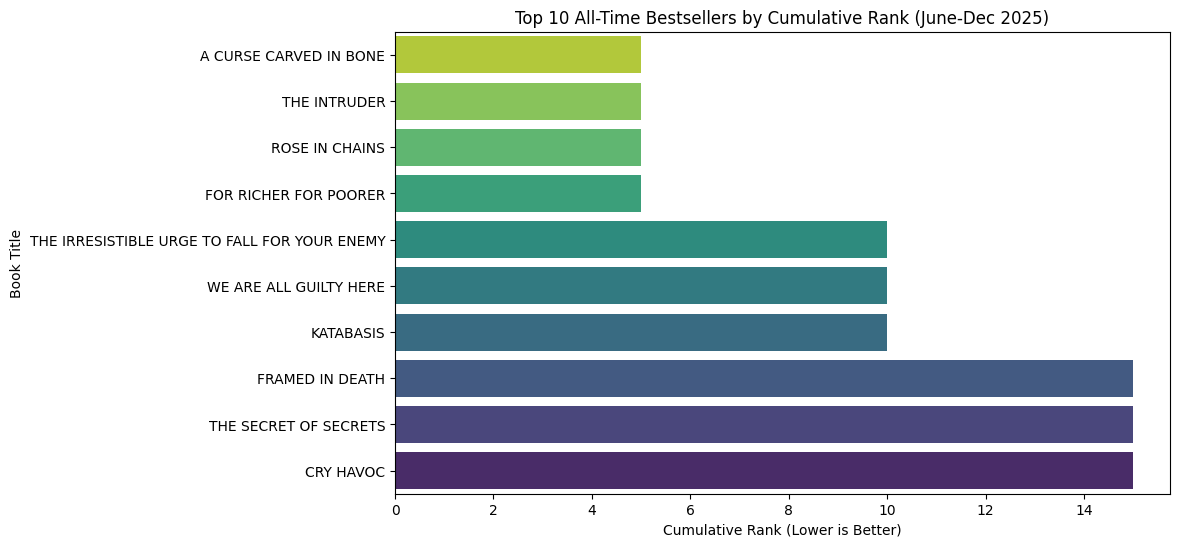

In [ ]:
# Sum ranks over weeks for each book (lower sum = better overall)
cumulative_rank = df.groupby('title')['rank'].sum().sort_values().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=cumulative_rank.values, y=cumulative_rank.index, palette='viridis_r')
plt.title("Top 10 All-Time Bestsellers by Cumulative Rank (June-Dec 2025)")
plt.xlabel("Cumulative Rank (Lower is Better)")
plt.ylabel("Book Title")
plt.show()

Top Performers (Cumulative Rank, Jun–Dec 2025)

Clear leaders: A CURSE CARVED IN BONE, THE INTRUDER, ROSE IN CHAINS, FOR RICHER FOR POORER

Strong mid-tier: THE IRRESISTIBLE URGE…, WE ARE ALL GUILTY HERE, KATABASIS

Still competitive: FRAMED IN DEATH, THE SECRET OF SECRETS, CRY HAVOC

<Figure size 1400x700 with 0 Axes>

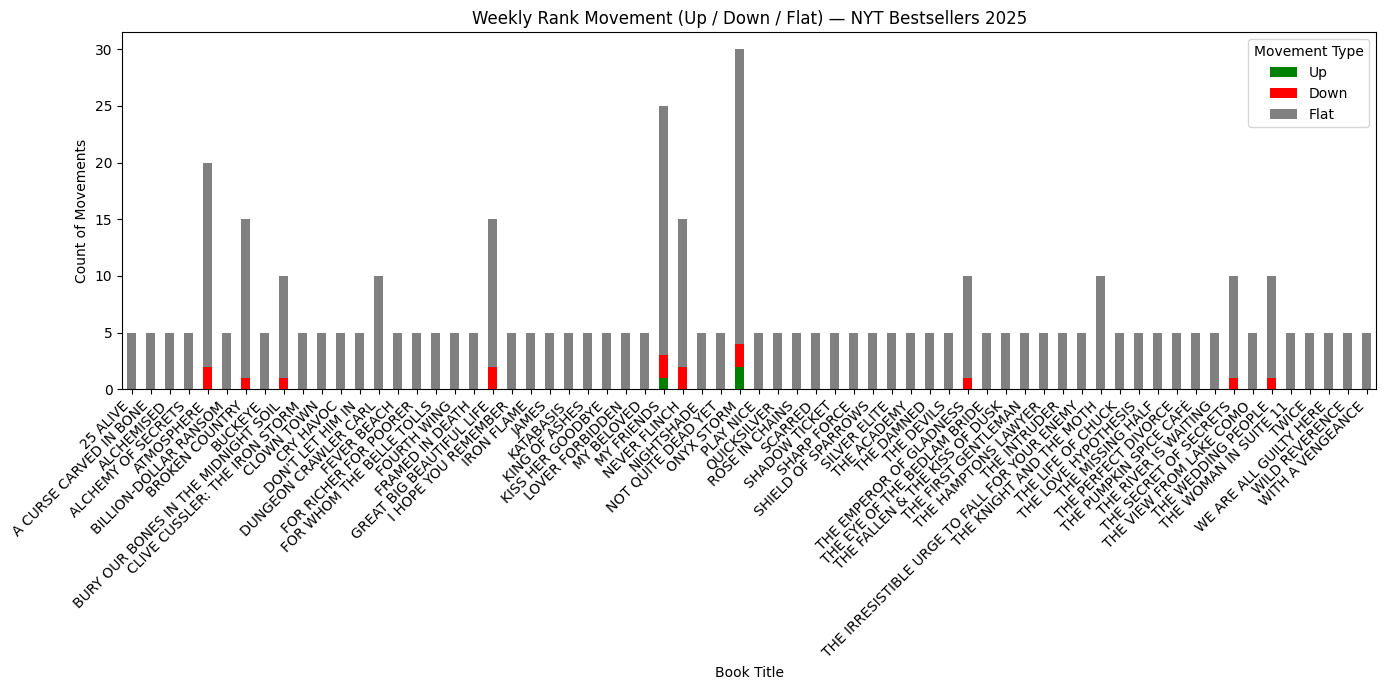

In [ ]:
df["Movement"] = df.groupby("title")["rank"].diff()

# Categorize movement
def classify(m):
    if pd.isna(m):
        return "Flat"
    if m < 0:
        return "Up"
    if m > 0:
        return "Down"
    return "Flat"

df["MovementType"] = df["Movement"].apply(classify)

movement_counts = (
    df.groupby(["title", "MovementType"])
      .size()
      .unstack(fill_value=0)
)

# Ensure all three columns exist
for col in ["Up", "Down", "Flat"]:
    if col not in movement_counts.columns:
        movement_counts[col] = 0


plt.figure(figsize=(14, 7))
movement_counts[["Up", "Down", "Flat"]].plot(
    kind="bar",
    stacked=True,
    figsize=(14, 7),
    color={"Up": "green", "Down": "red", "Flat": "gray"}
)

plt.title("Weekly Rank Movement (Up / Down / Flat) — NYT Bestsellers 2025")
plt.xlabel("Book Title")
plt.ylabel("Count of Movements")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Movement Type")
plt.tight_layout()
plt.show()

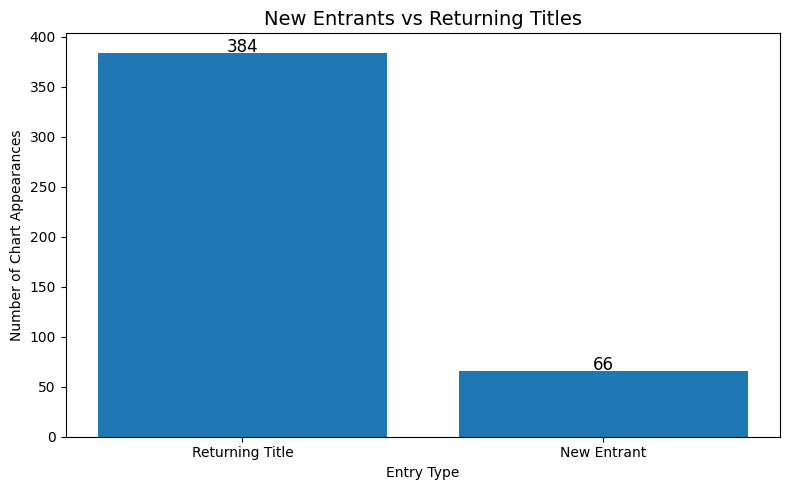

In [33]:
# Determine each book's first appearance
df['first_appearance'] = df.groupby('title')['date'].transform('min')

# Classify new vs returning
df['entry_type'] = df.apply(
    lambda row: 'New Entrant' if row['date'] == row['first_appearance'] else 'Returning Title',
    axis=1
)

# Count appearances
counts = df['entry_type'].value_counts()

plt.figure(figsize=(8, 5))

plt.bar(counts.index, counts.values)
plt.title("New Entrants vs Returning Titles", fontsize=14)
plt.xlabel("Entry Type")
plt.ylabel("Number of Chart Appearances")

# Optional: cleaner labels
for i, v in enumerate(counts.values):
    plt.text(i, v + 1, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

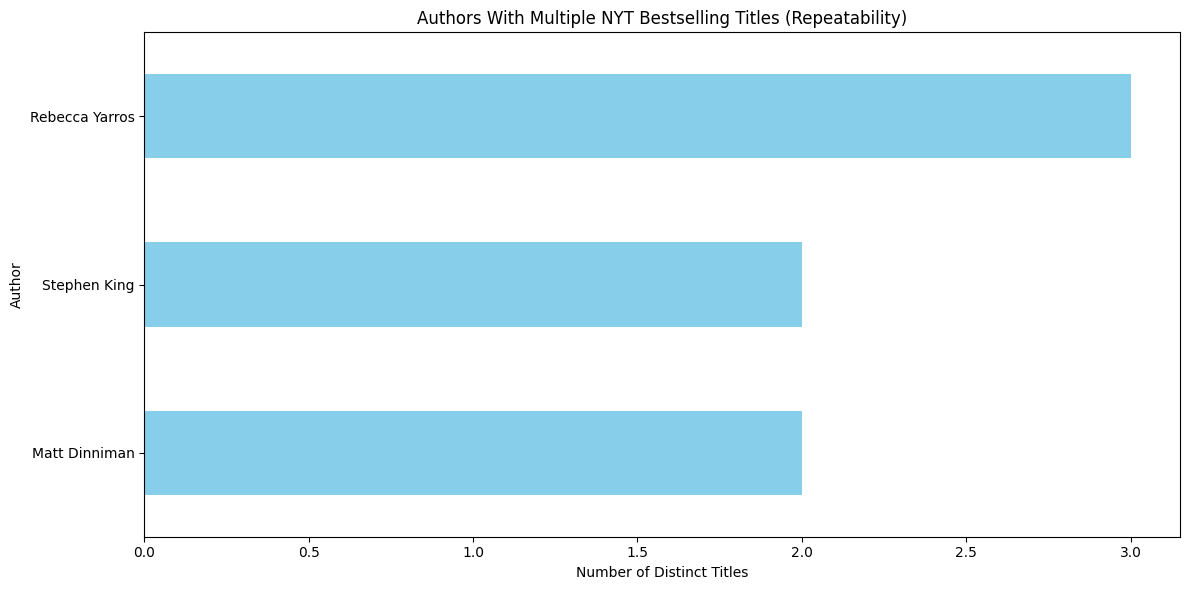

In [36]:
# Count unique titles per author
author_title_counts = df.groupby('author')['title'].nunique().sort_values(ascending=False)

# Filter for authors with repeat titles (2 or more)
repeat_authors = author_title_counts[author_title_counts >= 2]

# Plot
plt.figure(figsize=(12, 6))
repeat_authors.plot(kind='barh', color='skyblue')
plt.title("Authors With Multiple NYT Bestselling Titles (Repeatability)")
plt.xlabel("Number of Distinct Titles")
plt.ylabel("Author")
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()
